In [1]:
!pip install tenseal

In [2]:
# !pip install opencv-python
# ! pip install matplotlib

In [3]:
import cv2

from secPysift import *

IMG_NAME = 'uwu'
img1 = cv2.imread('uwu.png', 0)
# resize to 20 x 20
img1 = cv2.resize(img1, (20, 20))

In [4]:
img1.shape

(20, 20)

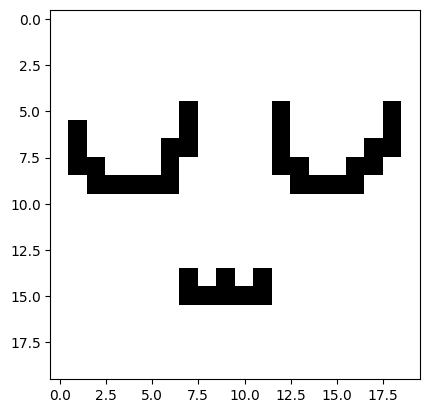

<Figure size 1000x1000 with 0 Axes>

In [5]:
from matplotlib import pyplot as plt
def plot_image(img, figure_size=(10, 10)):
    plt.imshow(img, cmap='gray')
    plt.figure(figsize=figure_size)
    plt.show()

plot_image(img1)

In [6]:
img1.shape

(20, 20)

In [7]:
import numpy as np
import tenseal as ts

In [8]:
## Encryption Parameters

# controls precision of the fractional part
bits_scale = 26

# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)

# set the scale
context.global_scale = pow(2, bits_scale)

# galois keys are required to do ciphertext rotations
context.generate_galois_keys()

secret_key = context.secret_key()
context.make_context_public()

In [9]:
def enc(image):
    enc_img = [[ts.ckks_vector(context=context, vector=[col]) for col in row] for row in image]
    enc_img = np.array(enc_img, dtype=ts.CKKSVector)

    return enc_img


In [10]:
enc_img = [[ts.ckks_vector(context=context, vector=[col]) for col in row] for row in img1]
enc_img = np.array(enc_img, dtype=ts.CKKSVector)
enc_img

array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fda216ec320>,
      dtype=object)

In [11]:
enc_img = enc(img1)

In [12]:
base_image = secGenerateBaseImage(enc_img, 1.6, 0.5, kernel_size=3)

Resize done


In [13]:
# base_image.shape

In [14]:
def dec(image):
    return np.array([[x.decrypt(secret_key) for x in row] for row in image])

In [15]:
# temp = dec(base_image)

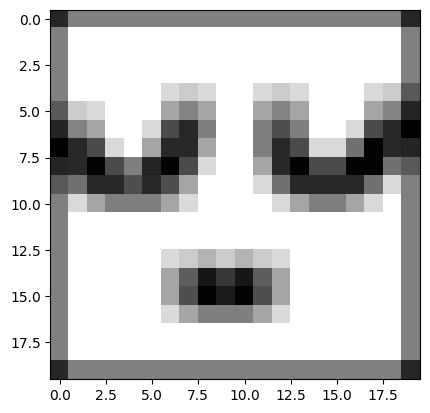

<Figure size 1000x1000 with 0 Axes>

In [16]:
plot_image(dec(base_image))

In [17]:
num_octaves = secComputeNumberOfOctaves(img1.shape)

In [18]:
num_octaves

3

In [19]:
gaussian_kernels = secGenerateGaussianKernels(1.6, 3)

In [20]:
gaussian_kernels

array([1.6       , 1.2262735 , 1.54500779, 1.94658784, 2.452547  ,
       3.09001559])

In [21]:
gaussian_images = secGenerateGaussianImages(base_image, num_octaves, gaussian_kernels)

 33%|███▎      | 1/3 [05:45<11:30, 345.04s/it]

Image shape:  (20, 20)


 67%|██████▋   | 2/3 [06:49<02:59, 180.00s/it]

Image shape:  (10, 10)


100%|██████████| 3/3 [06:57<00:00, 139.08s/it]

Image shape:  (5, 5)


In [22]:
gaussian_images[0][0].shape

(20, 20)

In [23]:
for oct in range(num_octaves):
    for i in range(len(gaussian_images[oct])):
        cv2.imwrite(f'{IMG_NAME}-{oct}-{i}.png',dec(gaussian_images[oct][i]))

In [24]:
gaussian_images = [[cv2.imread(f'{IMG_NAME}-{oct}-{i}.png', 0) for i in range(6)] for oct in range(num_octaves) ]

In [25]:
gaussian_images[0][0].shape

(20, 20)

Octave 1


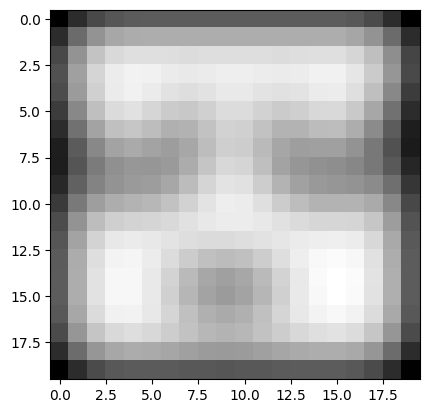

<Figure size 500x500 with 0 Axes>

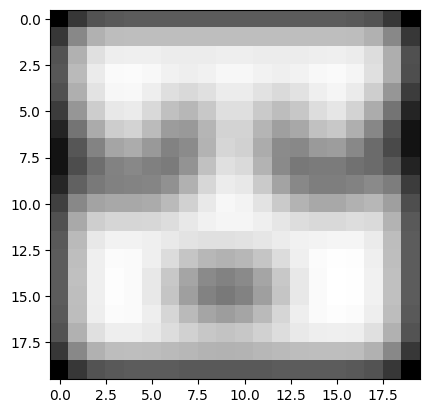

<Figure size 500x500 with 0 Axes>

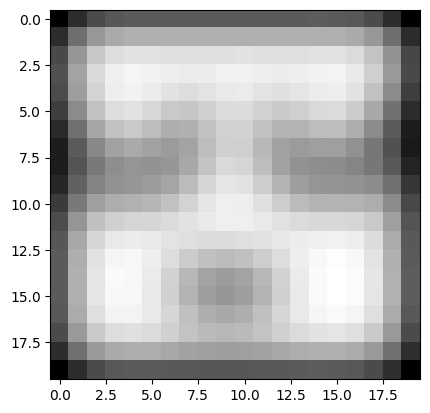

<Figure size 500x500 with 0 Axes>

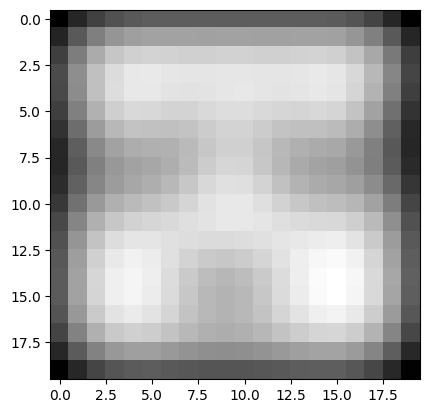

<Figure size 500x500 with 0 Axes>

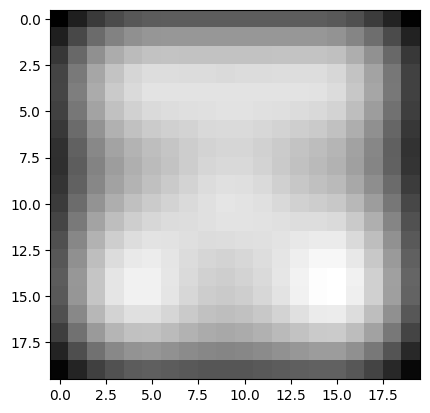

<Figure size 500x500 with 0 Axes>

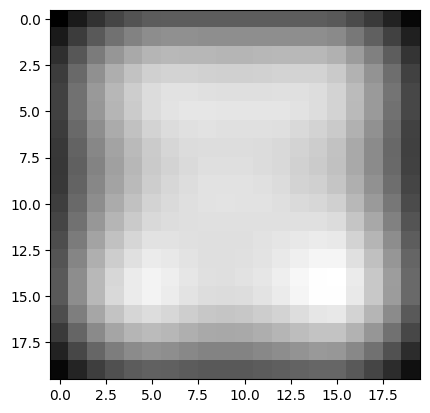

<Figure size 500x500 with 0 Axes>

Octave 2


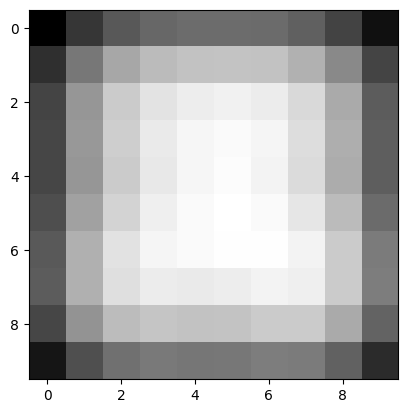

<Figure size 500x500 with 0 Axes>

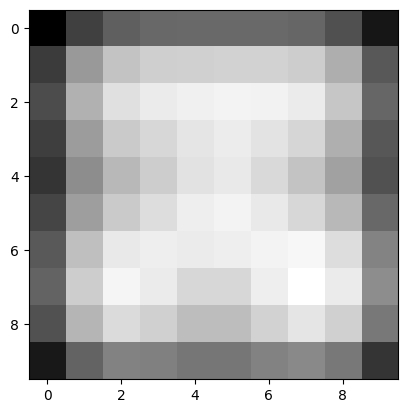

<Figure size 500x500 with 0 Axes>

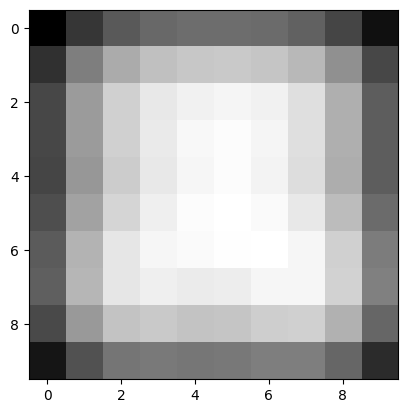

<Figure size 500x500 with 0 Axes>

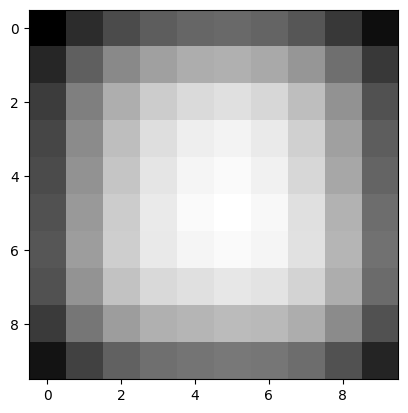

<Figure size 500x500 with 0 Axes>

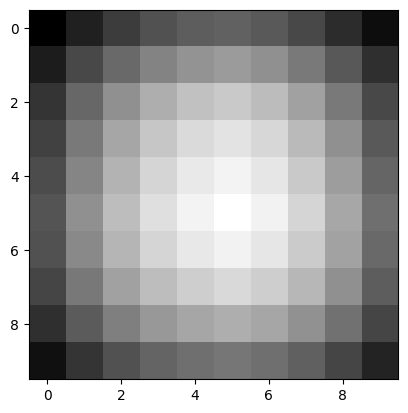

<Figure size 500x500 with 0 Axes>

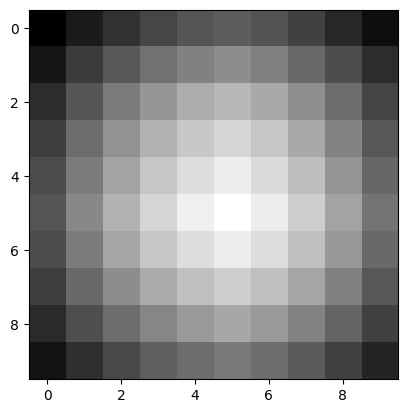

<Figure size 500x500 with 0 Axes>

Octave 3


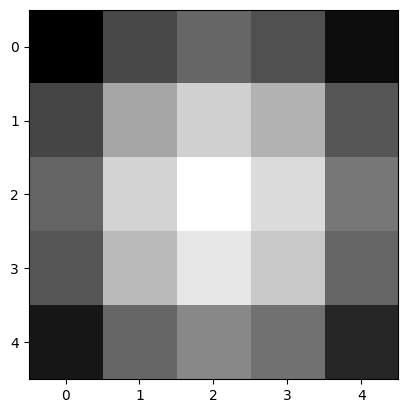

<Figure size 500x500 with 0 Axes>

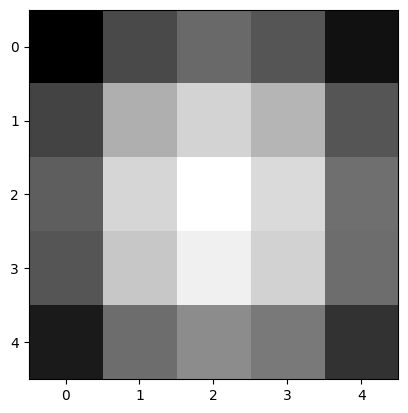

<Figure size 500x500 with 0 Axes>

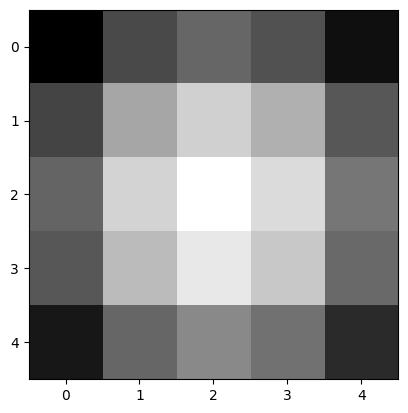

<Figure size 500x500 with 0 Axes>

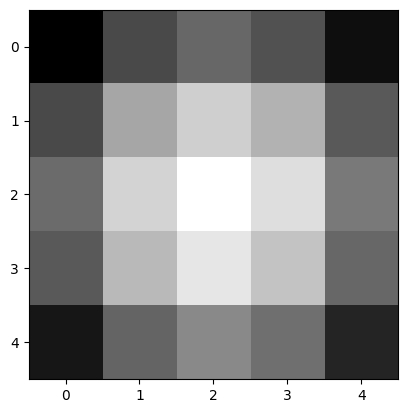

<Figure size 500x500 with 0 Axes>

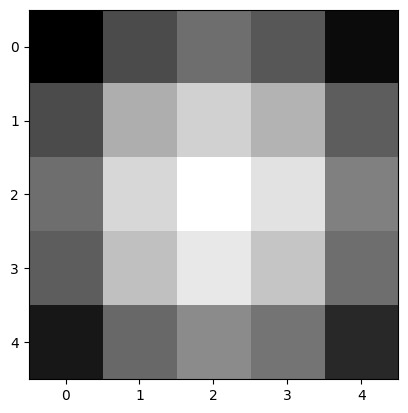

<Figure size 500x500 with 0 Axes>

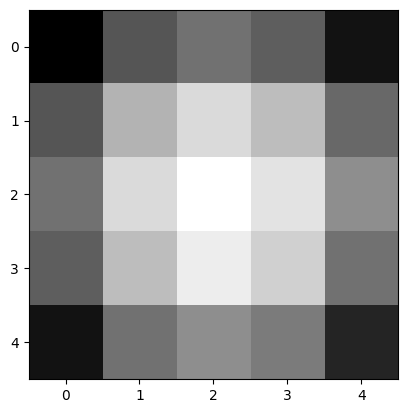

<Figure size 500x500 with 0 Axes>

In [26]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in gaussian_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [27]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for i in range(len(gaussian_images[octave])):
        gaussian_images[octave][i] = enc(gaussian_images[octave][i])

Octave 1
Octave 2
Octave 3


In [28]:
dog_images = secGenerateDoGImages(gaussian_images)

In [29]:
dog_images[0][0].shape

(20, 20)

Octave 1


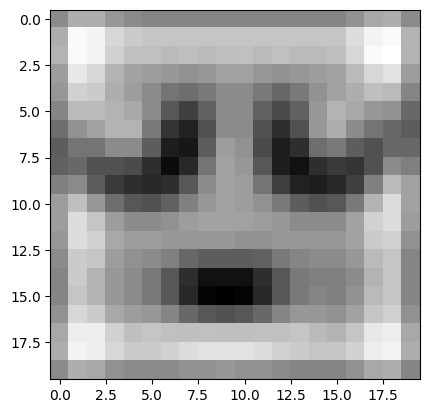

<Figure size 500x500 with 0 Axes>

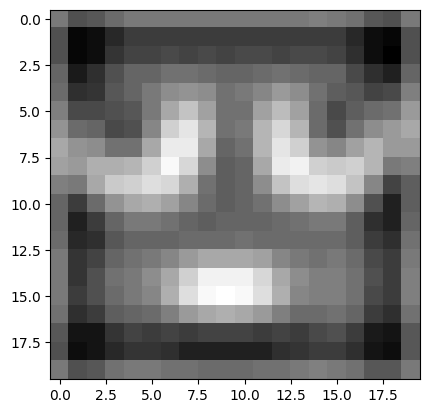

<Figure size 500x500 with 0 Axes>

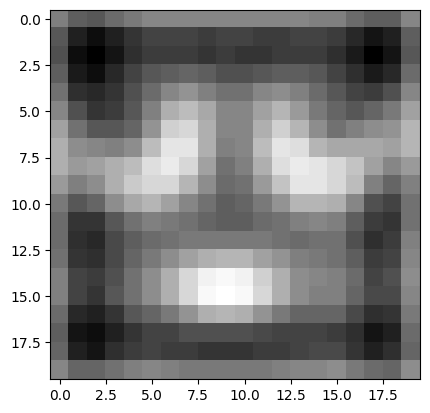

<Figure size 500x500 with 0 Axes>

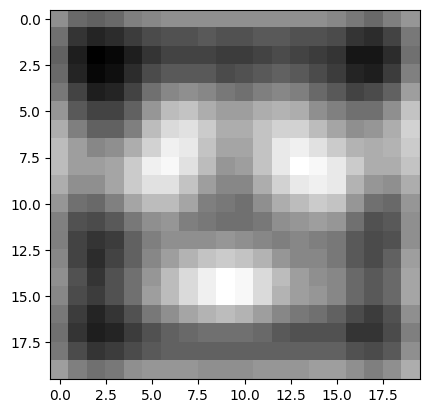

<Figure size 500x500 with 0 Axes>

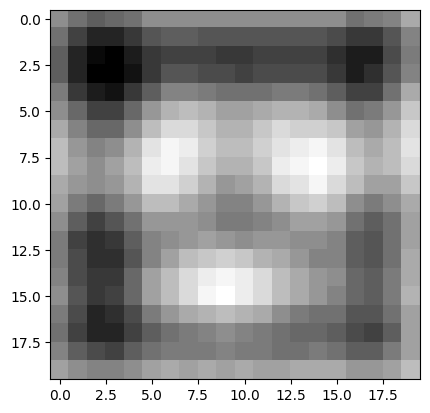

<Figure size 500x500 with 0 Axes>

Octave 2


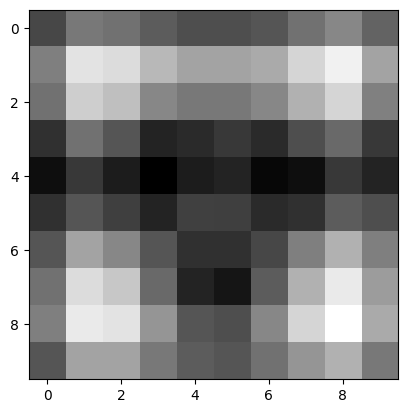

<Figure size 500x500 with 0 Axes>

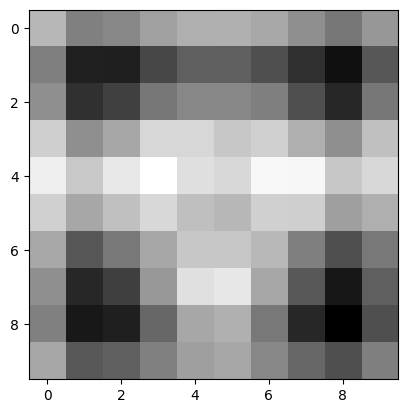

<Figure size 500x500 with 0 Axes>

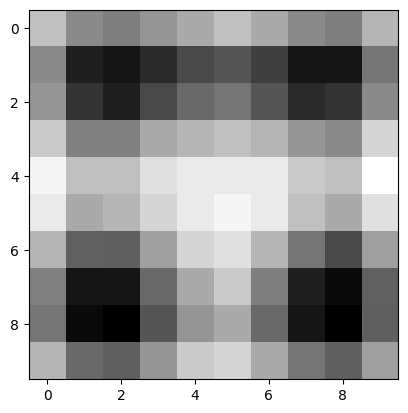

<Figure size 500x500 with 0 Axes>

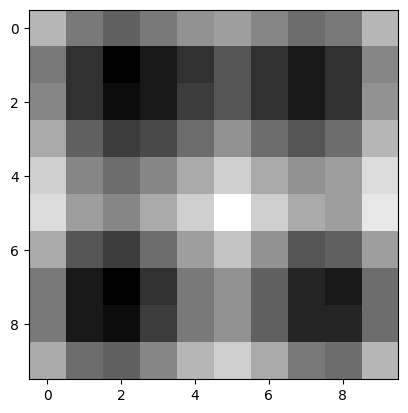

<Figure size 500x500 with 0 Axes>

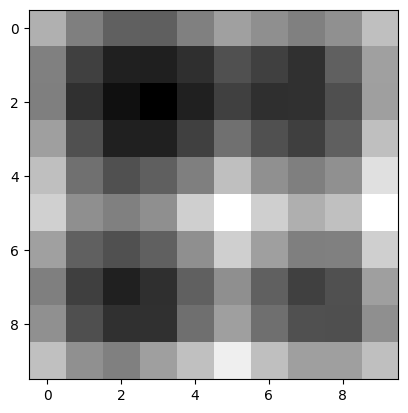

<Figure size 500x500 with 0 Axes>

Octave 3


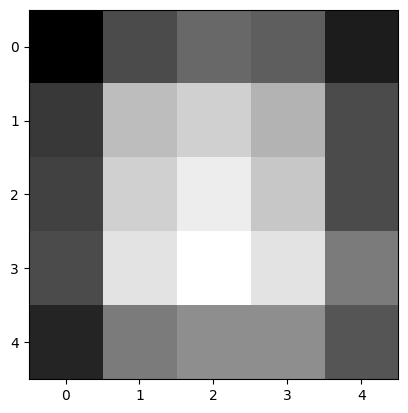

<Figure size 500x500 with 0 Axes>

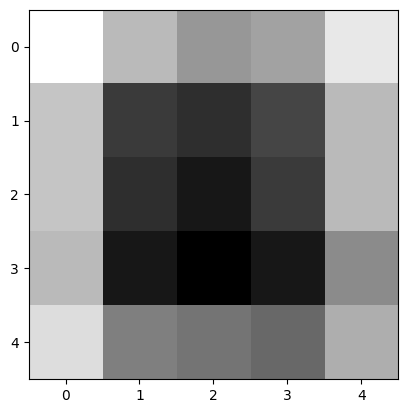

<Figure size 500x500 with 0 Axes>

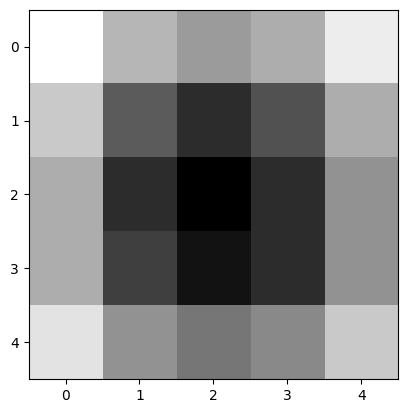

<Figure size 500x500 with 0 Axes>

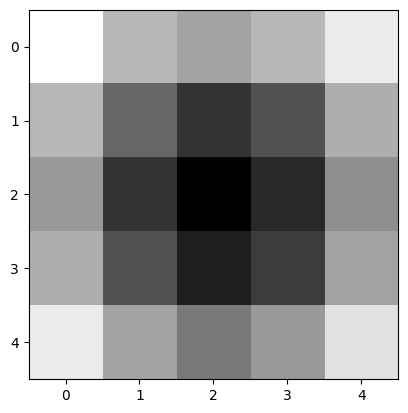

<Figure size 500x500 with 0 Axes>

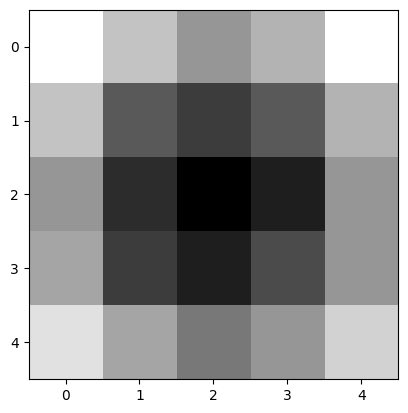

<Figure size 500x500 with 0 Axes>

In [30]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in dog_images[octave]:
        plot_image(dec(image), figure_size=(5, 5))

In [31]:
for oct in range(num_octaves):
    for i in range(len(dog_images[oct])):
        cv2.imwrite(f'dog-{IMG_NAME}-{oct}-{i}.png',dec(dog_images[oct][i]))

In [32]:
dog_images = [[cv2.imread(f'dog-{IMG_NAME}-{oct}-{i}.png', 0) for i in range(5)] for oct in range(num_octaves) ]

In [33]:
dog_images[0][0]

array([[ 5, 11, 11,  7,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         6, 10, 11,  5],
       [11, 24, 23, 18, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        19, 23, 24, 12],
       [12, 24, 23, 17, 14, 14, 13, 14, 13, 14, 14, 13, 14, 13, 13, 14,
        18, 24, 25, 12],
       [ 8, 21, 18, 12,  9,  8,  7,  6,  7,  9,  9,  7,  6,  7,  8,  9,
        13, 18, 20,  8],
       [ 7, 17, 16, 11,  8,  5,  1,  0,  2,  5,  5,  2,  0,  2,  6,  9,
        11, 14, 13,  4],
       [ 4, 13, 13, 12, 10,  5,  0,  0,  0,  5,  5,  0,  0,  0,  7, 12,
        10,  7,  6,  0],
       [ 0,  6,  9, 12, 12,  2,  0,  0,  0,  5,  5,  0,  0,  0,  7, 11,
         5,  1,  0,  0],
       [ 0,  1,  1,  5,  5,  0,  0,  0,  0,  8,  6,  0,  0,  0,  0,  2,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  9,  7,  0,  0,  0,  0,  0,
         0,  0,  5,  3],
       [ 3,  5,  0,  0,  0,  0,  0,  0,  5,  9,  8,  1,  0,  0,  0,  0,
         0,  3, 13,  9],
       [ 8, 14,  7,  0,  0,  0

Octave 1


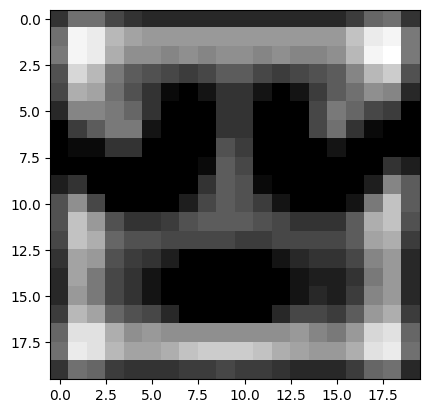

<Figure size 500x500 with 0 Axes>

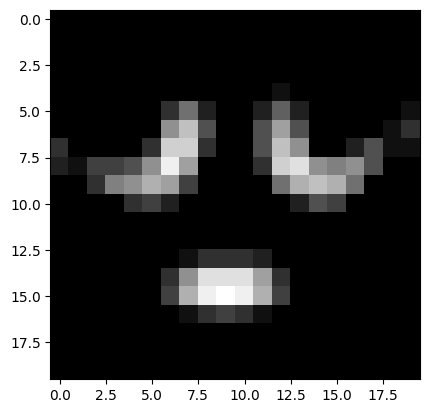

<Figure size 500x500 with 0 Axes>

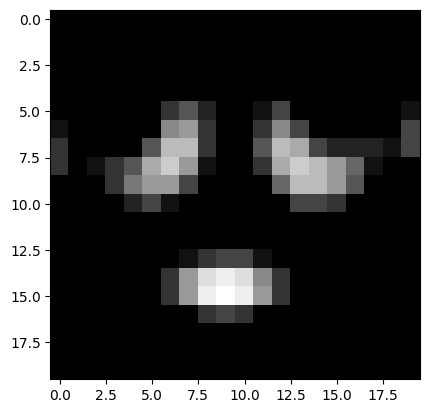

<Figure size 500x500 with 0 Axes>

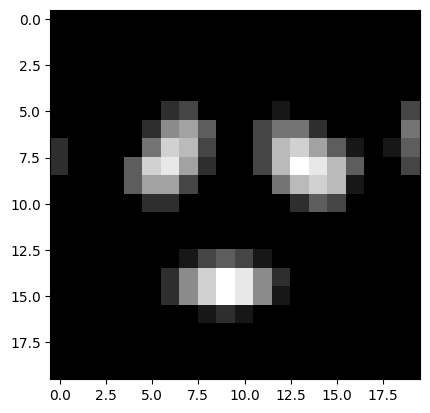

<Figure size 500x500 with 0 Axes>

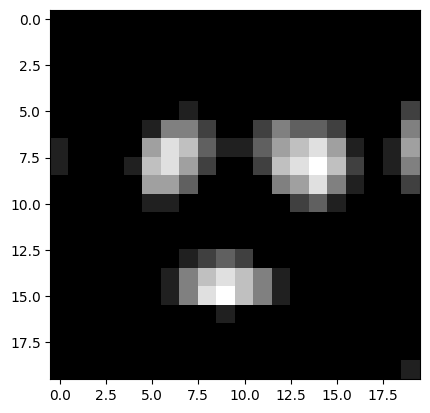

<Figure size 500x500 with 0 Axes>

Octave 2


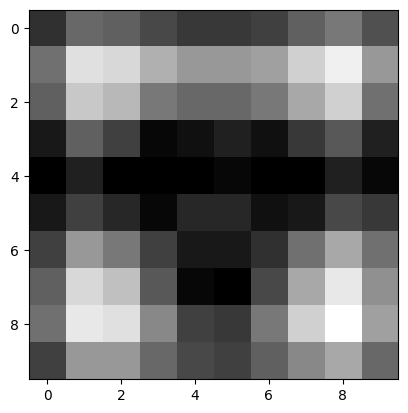

<Figure size 500x500 with 0 Axes>

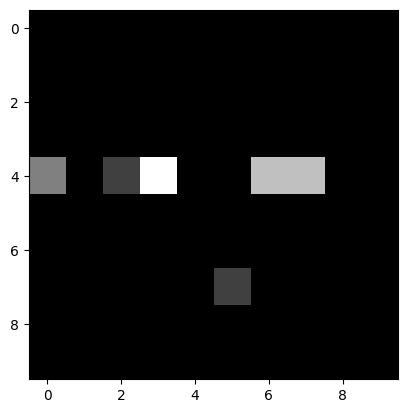

<Figure size 500x500 with 0 Axes>

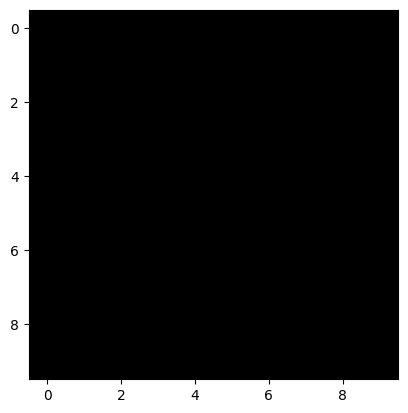

<Figure size 500x500 with 0 Axes>

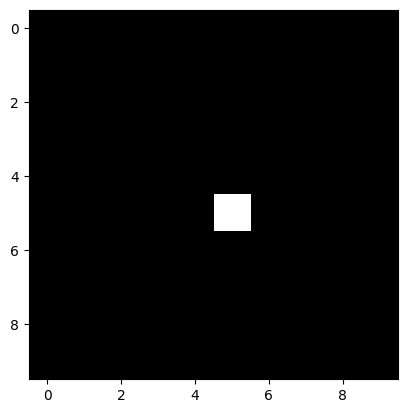

<Figure size 500x500 with 0 Axes>

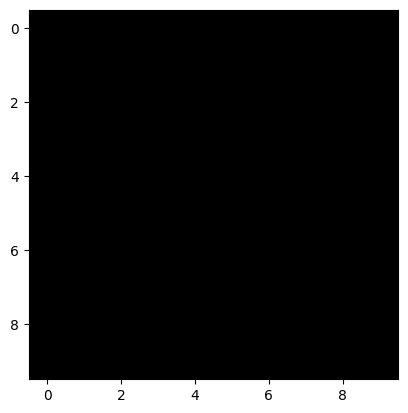

<Figure size 500x500 with 0 Axes>

Octave 3


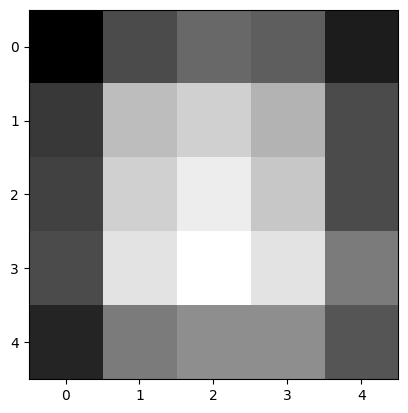

<Figure size 500x500 with 0 Axes>

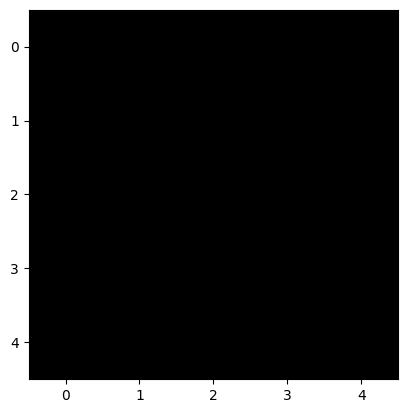

<Figure size 500x500 with 0 Axes>

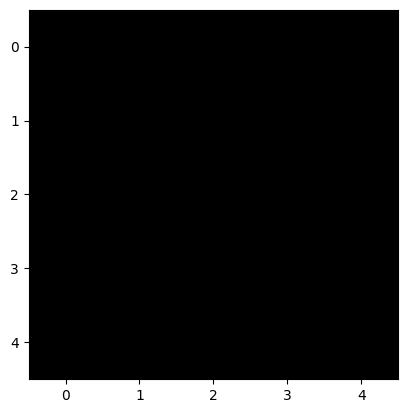

<Figure size 500x500 with 0 Axes>

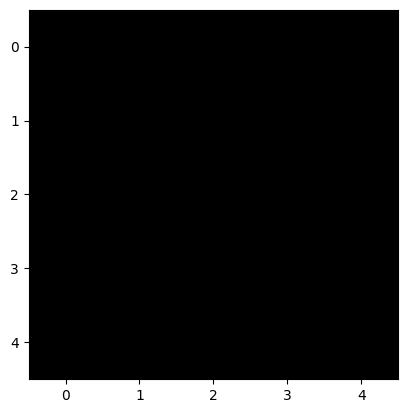

<Figure size 500x500 with 0 Axes>

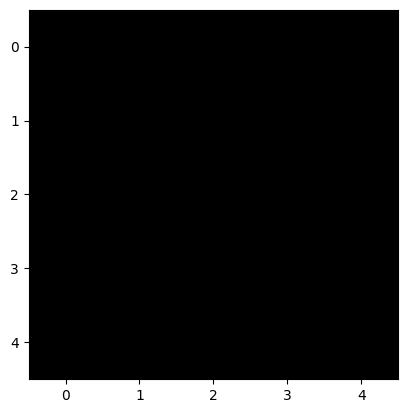

<Figure size 500x500 with 0 Axes>

In [34]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in dog_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [35]:
def cmp(x, a, b):
    if isinstance(x, ts.CKKSVector):
        x = x.decrypt(secret_key)[0]
    if isinstance(a, ts.CKKSVector):
        a = a.decrypt(secret_key)[0]
    if isinstance(b, ts.CKKSVector):
        b = b.decrypt(secret_key)[0]
    return ts.ckks_vector(context=context, vector=[int(a < x < b)])
    

In [36]:
sigma=1.6
num_intervals=3
assumed_blur=0.5
image_border_width=5

In [37]:
for octave in range(num_octaves):
    for i in range(len(dog_images[octave])):
        dog_images[octave][i] = enc(dog_images[octave][i])

In [38]:
dog_images

[[array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fda21496780>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd9a82476b0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd9a8247260>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd91f8e0230>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd9a8214830>,
        dtype=object)],
 [array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fda2149d9a0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd9a82d1760>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd9a82d07a0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd9a82d25a0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fd9a8153830>,
        dtype=object)],
 [array(

In [39]:
def refresh(value):
    # print("Value: ", value)
    decrypted_value = value.decrypt(secret_key)[0]
    return ts.ckks_vector(context=context, vector=[decrypted_value])

In [40]:
# def localizeExtremumViaQuadraticFit(i, j, image_index, octave_index, num_intervals, dog_images_in_octave, sigma, contrast_threshold, image_border_width, eigenvalue_ratio=10, num_attempts_until_convergence=1, cmp = None):
#     """Iteratively refine pixel positions of scale-space extrema via quadratic fit around each extremum's neighbors
#     """
#     print("Num attempts uwu: ", num_attempts_until_convergence)
#     extremum_is_outside_image = False
#     image_shape = dog_images_in_octave[0].shape
#     extremum_update = np.array([1, 1, 1], dtype='float32')  # (di, dj, ds)
#         # need to convert from uint8 to float32 to compute derivatives and need to rescale pixel values to [0, 1] to apply Lowe's thresholds
#     first_image, second_image, third_image = dog_images_in_octave[image_index-1:image_index+2]
#     pixel_cube = np.stack([first_image[i-1:i+2, j-1:j+2],
#                         second_image[i-1:i+2, j-1:j+2],
#                         third_image[i-1:i+2, j-1:j+2]]) * (1 / 255)
#     print("Pixel cube shape: ", pixel_cube.shape)
#     # print("Pixel cube: ", pixel_cube)
#     gradient = computeGradientAtCenterPixel(pixel_cube)
#     hessian = computeHessianAtCenterPixel(pixel_cube)
#     ltsq_val, denominator = secLTSQ(hessian, gradient)
#     # ltsq_val = ltsq_val[0]
#     print("LTSQ val: ", ltsq_val[0].decrypt(secret_key))
#     extremum_update = -ltsq_val

#     extremum_update = [extremum_update[i].decrypt(secret_key)[0] for i in range(3)]
#     extremum_update = [ts.ckks_vector(context=context, vector=[extremum_update[i]]) for i in range(3)]
#     extremum_update = np.array(extremum_update, dtype=ts.CKKSVector)

#     # cmp = lambda x, a, b: a < x < b
#     # condition1 =  abs(extremum_update[0]) < 0.5 * denominator and abs(extremum_update[1]) < 0.5 * denominator and abs(extremum_update[2]) < 0.5 * denominator
#     condition1 = (cmp(extremum_update[0], -0.5 * denominator, 0.5 * denominator) 
#                     * cmp(extremum_update[1], -0.5 * denominator, 0.5 * denominator) 
#                     * cmp(extremum_update[2], -0.5 * denominator, 0.5 * denominator))
#     functionValueAtUpdatedExtremum = pixel_cube[1, 1, 1] * denominator + 0.5 * np.dot(gradient, extremum_update)

#     functionValueAtUpdatedExtremum = refresh(functionValueAtUpdatedExtremum)
    
#     # condition2 = abs(functionValueAtUpdatedExtremum) * num_intervals >= contrast_threshold * denominator
#     condition2 = -cmp(functionValueAtUpdatedExtremum * num_intervals, -contrast_threshold * denominator, -contrast_threshold * denominator) + 1
    
#     xy_hessian = hessian[:2, :2]
#     xy_hessian_trace = secTrace(xy_hessian)
#     xy_hessian_det = secDet2x2(xy_hessian)
#     # condition3 =  xy_hessian_det > 0 and eigenvalue_ratio * (xy_hessian_trace ** 2) < ((eigenvalue_ratio + 1) ** 2) * xy_hessian_det
#     condition3 = cmp(xy_hessian_det, 0, 10000) * cmp(eigenvalue_ratio * (xy_hessian_trace ** 2), -10000, ((eigenvalue_ratio + 1) ** 2) * xy_hessian_det)
#     # Contrast check passed -- construct and return OpenCV KeyPoint object
#     # Ignoring extram_update[2] in size, because it will be of the order 1 - 1.2 which is negligible
#     keypoint = EncKeyPoint(
#         is_keypoint_present = condition1 * condition2 * condition3,
#         size = sigma * (2 ** ((image_index) / (num_intervals))) * (2 ** (octave_index + 1)),
#         # response= secAbs(functionValueAtUpdatedExtremum) # check if needed later
#         response= (functionValueAtUpdatedExtremum)
#     )
#     # keypoint.pt = ((j + extremum_update[0]) * (2 ** octave_index), (i + extremum_update[1]) * (2 ** octave_index))
#     # keypoint.octave = octave_index + image_index * (2 ** 8) + int(round((extremum_update[2] + 0.5) * 255)) * (2 ** 16)
#     # keypoint.size = sigma * (2 ** ((image_index + extremum_update[2]) / np.float32(num_intervals))) * (2 ** (octave_index + 1))  # octave_index + 1 because the input image was doubled
#     # keypoint.response = secAbs(functionValueAtUpdatedExtremum)
#     return keypoint
#     # return None

In [41]:
# localizeExtremumViaQuadraticFit(image_border_width,image_border_width,1,0,num_intervals,dog_images[0],sigma,0.03,image_border_width, cmp=cmp)

In [42]:
keypoints, flat_list = secFindScaleSpaceExtrema(gaussian_images, dog_images, num_intervals, sigma, image_border_width, cmp=cmp, refresh=np.vectorize(refresh))

Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts:  1
Num attempts: 

In [43]:
x = keypoints[0][0][0][0][0]

In [44]:
x.is_keypoint_present.decrypt(secret_key)[0]

6.4308887918247875e-06

In [45]:
error_margin = 0.0001


In [46]:
def iterimg(imgs):
    for octave in range(num_octaves):
        for i in range(len(imgs[octave])):
            yield np.array(imgs[octave][i])

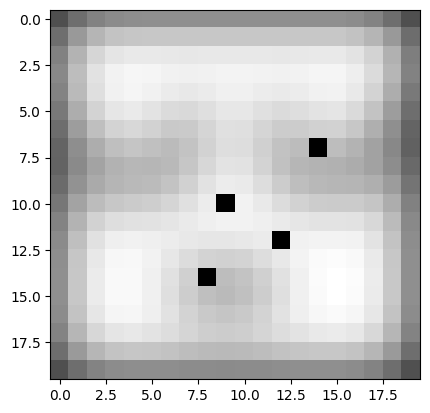

<Figure size 1000x1000 with 0 Axes>

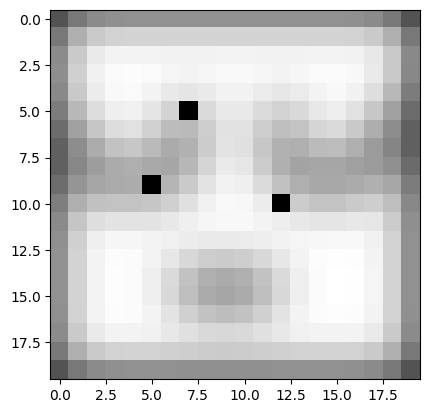

<Figure size 1000x1000 with 0 Axes>

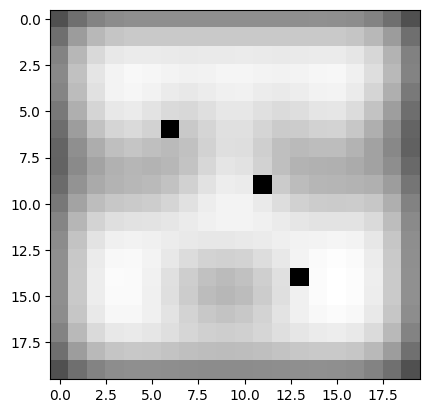

<Figure size 1000x1000 with 0 Axes>

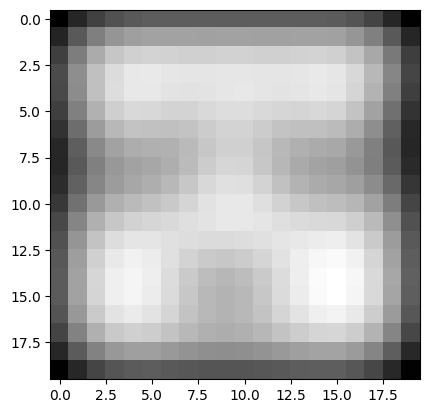

<Figure size 1000x1000 with 0 Axes>

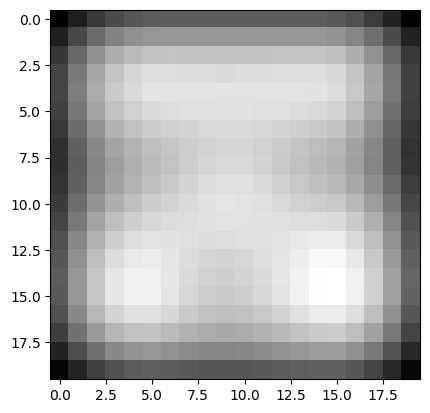

<Figure size 1000x1000 with 0 Axes>

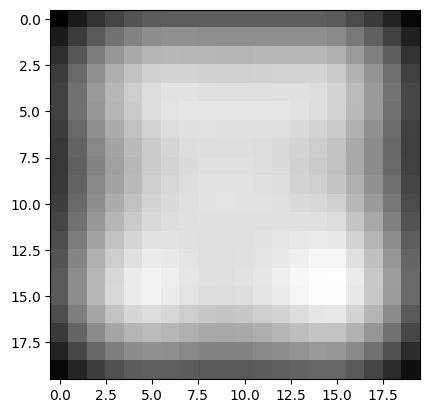

<Figure size 1000x1000 with 0 Axes>

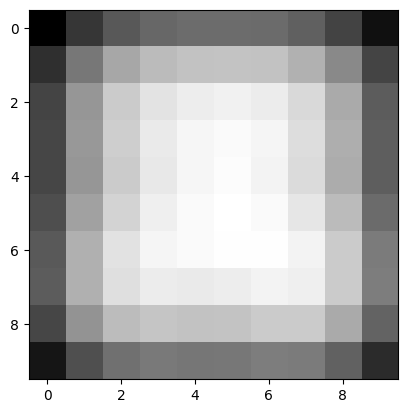

<Figure size 1000x1000 with 0 Axes>

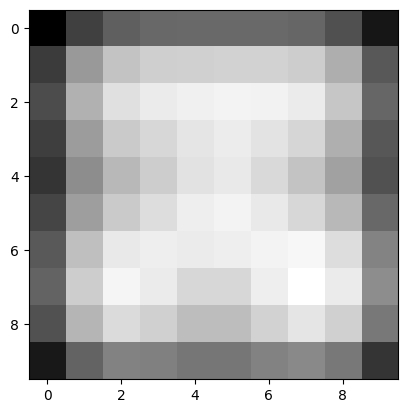

<Figure size 1000x1000 with 0 Axes>

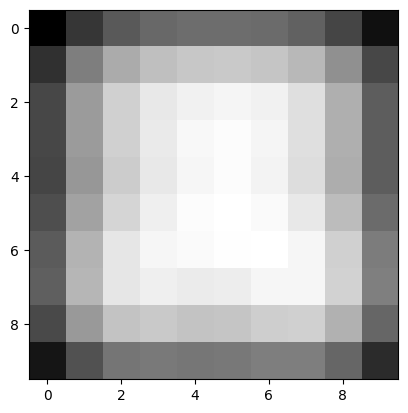

<Figure size 1000x1000 with 0 Axes>

In [47]:
for kp, img in zip(iterimg(keypoints), iterimg(gaussian_images)):
    # print(kp.shape, (img).shape)
    dec_img = dec(img)
    for k in kp.flatten():
        dec_img[k.i][k.j] *= 0 if k.is_keypoint_present.decrypt(secret_key)[0] > 0.5 else 1
    plot_image(dec_img)
